In [1]:
%matplotlib inline

In [2]:
import numpy as np
import iopro
import matplotlib.pyplot as plt
from custom_python_utilities.histR import histR, histRec
from custom_python_utilities.corrgram import corrgram, corrgramRec
from utilities import apply_cut

In [3]:
X = iopro.genfromtxt('data/event_features.csv', names=True, delimiter=',')
X['event_weight'] *= 100

In [4]:
legend_names=[r'$D\tau_h$', r'$D^*\tau_h$', r'$SL$', r'$Had$', r'$Cont$']

typeset_name = { 
    'ny' : r'$n\Upsilon$',
    'ntrk' : r'$N_{track}$',
    'r2' : r'$R_2$',
    'cand_score' : r'Cand.ML',
    'mmiss_prime2' : r'$M^2_{miss}$',
    'eextra50' : r'$E_{extra}$',
    'costhetat' : r'$\cos\theta_T$',
    'tag_lp3' : r'$|\vec{p}^{tag}_\ell|$',
    'tag_cosby' : r'$\cos\theta^{tag}_{B\Upsilon}$',
    'tag_costhetadl' : r'$\cos\theta^{tag}_{D\ell}$',
    'tag_dmass' : r'$m^{tag}_{D}$',
    'tag_deltam' : r'$\Delta m^{tag}$',
    'tag_costhetadsoft' : r'$\cos\theta^{tag}_{Dsoft}$',
    'tag_softp3magcm' : r'$|\vec{p}^{tag}_{soft}|$',
    'sig_hp3' : r'$|\vec{p}^{sig}_{h}|$',
    'sig_cosby' : r'$\cos\theta^{sig}_{B\Upsilon}$',
    'sig_costhetadtau' : r'$\cos\theta^{sig}_{D\tau}$',
    'sig_vtxb' : r'$\chi^2_{sigB}$',
    'sig_dmass' : r'$m^{sig}_{D}$',
    'sig_deltam' : r'$\Delta m^{sig}$',
    'sig_costhetadsoft' : r'$\cos\theta^{sig}_{Dsoft}$',
    'sig_softp3magcm' : r'$|\vec{p}^{sig}_{soft}|$',
    'sig_hmass' : r'$m^{sig}_h$',
    'sig_vtxh' : r'$\chi^2_{sigh}$',
    'tag_dtype' : r'tag $D$ mode',
    'tag_dstartype' : r'tag $D^*$ mode',
    'sig_dtype' : r'sig $D$ mode',
    'sig_dstartype' : r'sig $D^*$ mode',
    'tag_l_epid' : r'tag $\ell$ electron PID',
    'tag_l_mupid' : r'tag $\ell$ muon PID',
    'sig_h_epid' : r'sig $h$ electron PID',
    'sig_h_mupid' : r'sig $h$ muon PID',
    'rf_useopt_score' : r'Sig.ML',
    'rf_dvsdstar_sigmc_score' : r'$D^{*}\tau$.ML', 
}

corrgram_vars = [ 
    'eextra50', 
    'mmiss_prime2',    
    'sig_hp3',
    'rf_dvsdstar_sigmc_score', 
    'rf_useopt_score',
]

corrgram_varnames = [ typeset_name[x] for x in corrgram_vars ]

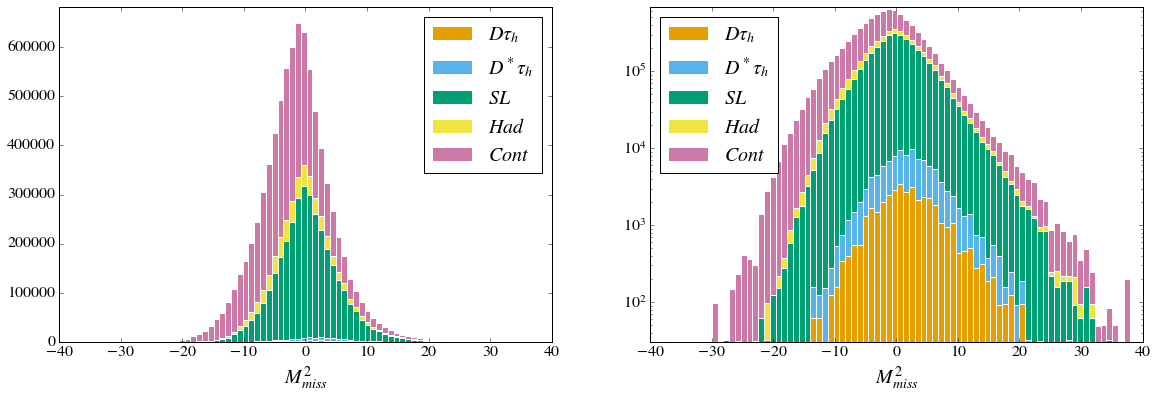

In [5]:
X_cut = apply_cut(X, 'mmiss_prime2', lower=-40, upper=40)

fig = plt.figure(figsize=(12*1.618, 6))

ax = fig.add_subplot(121)
ax.tick_params(axis='both', which='major', labelsize=16)
histRec(X_cut, 'mmiss_prime2', weights='event_weight', Y='mc_evttype', ax=ax, 
        stacked=True, show_hist=True, bins=80, 
        xlabel=typeset_name['mmiss_prime2'],
        legend_names=legend_names,
        legend=True)

ax = fig.add_subplot(122)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)
histRec(X_cut, 'mmiss_prime2', weights='event_weight', Y='mc_evttype', ax=ax, 
        stacked=True, show_hist=True, bins=80, 
        xlabel=typeset_name['mmiss_prime2'],
        legend_names=legend_names,
        legend=True)

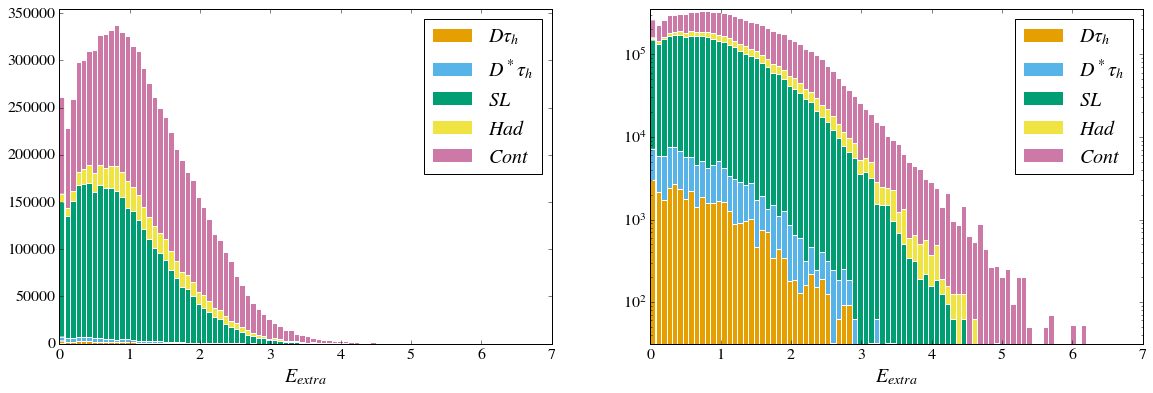

In [6]:
X_cut = apply_cut(X, 'eextra50')

fig = plt.figure(figsize=(12*1.618, 6))

ax = fig.add_subplot(121)
ax.tick_params(axis='both', which='major', labelsize=16)
histRec(X_cut, 'eextra50', weights='event_weight', Y='mc_evttype', ax=ax, 
        stacked=True, show_hist=True, bins=80, 
        xlabel=typeset_name['eextra50'],
        legend_names=legend_names,
        legend=True)

ax = fig.add_subplot(122)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)
histRec(X_cut, 'eextra50', weights='event_weight', Y='mc_evttype', ax=ax, 
        stacked=True, show_hist=True, bins=80, 
        xlabel=typeset_name['eextra50'],
        legend_names=legend_names,
        legend=True)

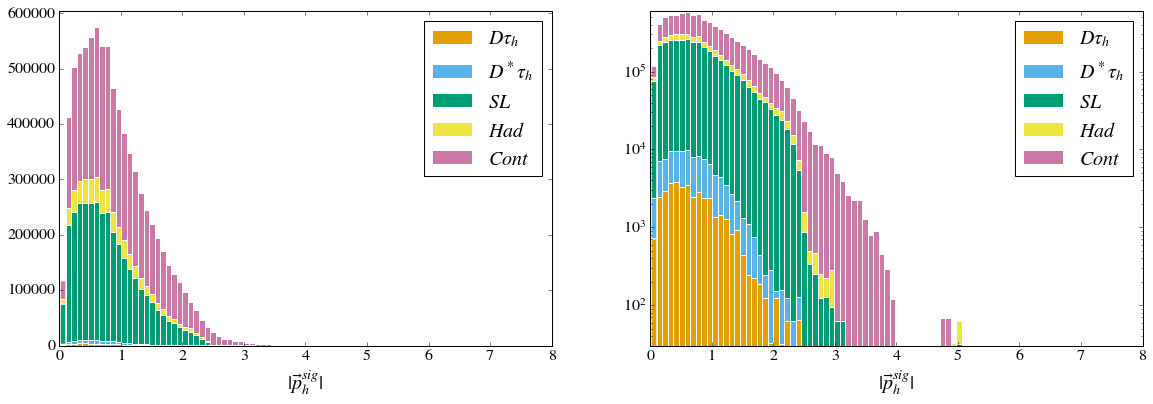

In [7]:
X_cut = apply_cut(X, 'sig_hp3')

fig = plt.figure(figsize=(12*1.618, 6))

ax = fig.add_subplot(121)
ax.tick_params(axis='both', which='major', labelsize=16)
histRec(X_cut, 'sig_hp3', weights='event_weight', Y='mc_evttype', ax=ax, 
        stacked=True, show_hist=True, bins=80, 
        xlabel=typeset_name['sig_hp3'],
        legend_names=legend_names,
        legend=True)

ax = fig.add_subplot(122)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)
histRec(X_cut, 'sig_hp3', weights='event_weight', Y='mc_evttype', ax=ax, 
        stacked=True, show_hist=True, bins=80, 
        xlabel=typeset_name['sig_hp3'],
        legend_names=legend_names,
        legend=True)

In [8]:
def group_mc_evttype(X):
    mc_evttypes = X['mc_evttype'].astype(int)
    is_signal = (mc_evttypes == 1) | (mc_evttypes == 2)
    mc_evttypes[is_signal] = 1
    mc_evttypes[~is_signal] = 2
    X['mc_evttype'] = mc_evttypes
group_mc_evttype(X)

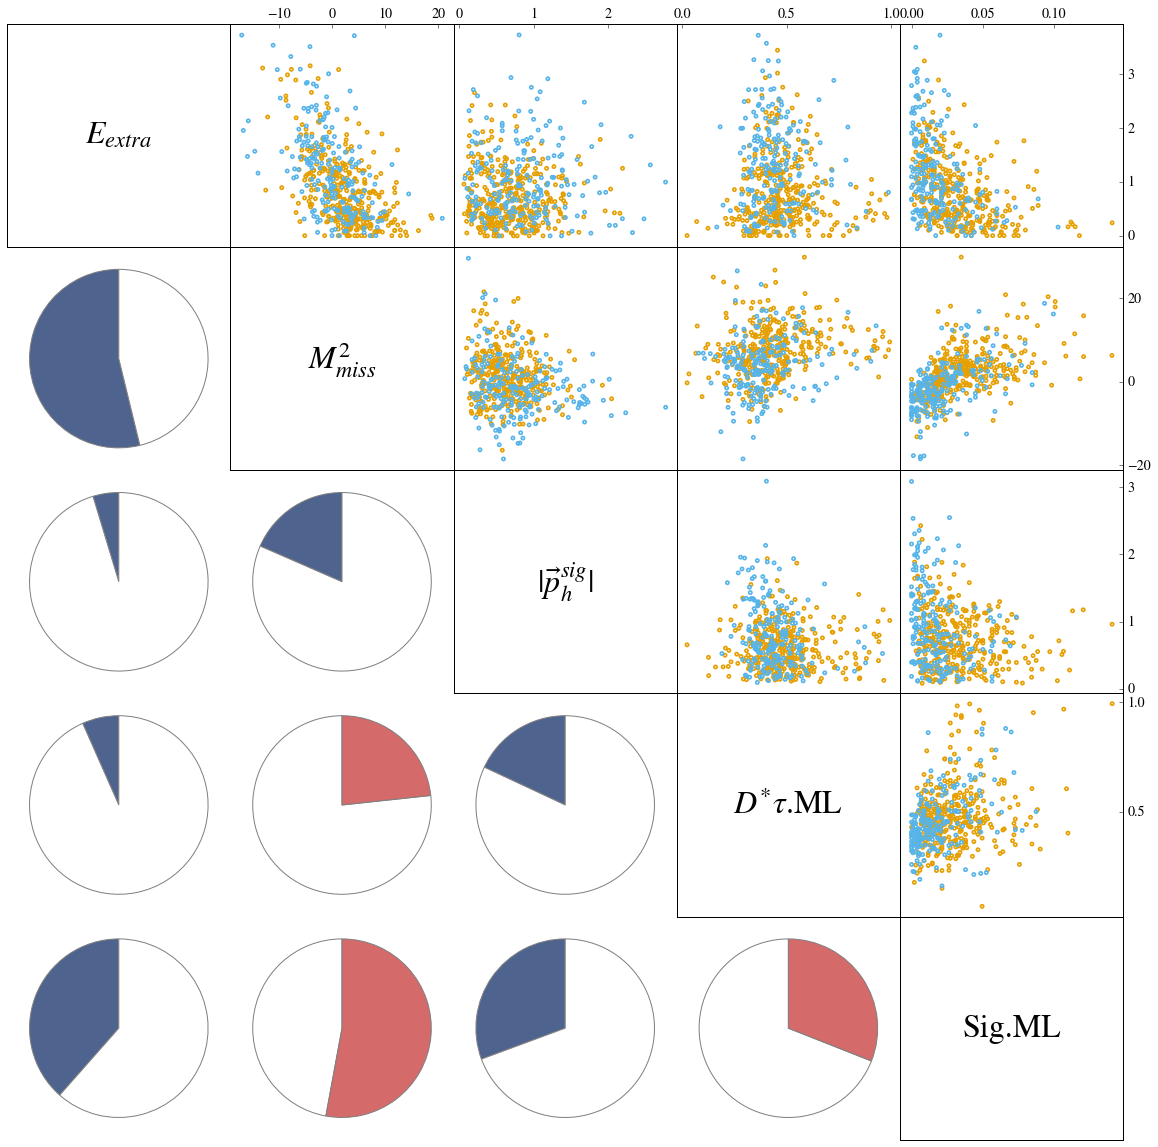

In [9]:
corrgramRec(X, Y='mc_evttype', 
            fields=corrgram_vars, alias=corrgram_varnames, 
            figsize=(20,20),
            marker_size=10,
            diag_fontsize=32,
            undersample=[0.1, 0.001]);